# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

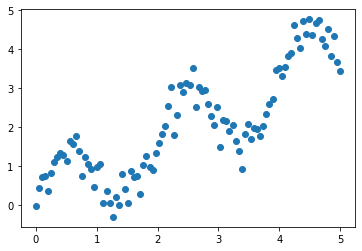

In [5]:
plt.scatter(x,y)

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [7]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [8]:
regr_lin.fit(X,y)

LinearRegression()

0.5797936118984435


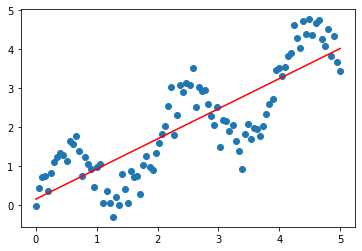

In [9]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [10]:
print(x.shape)

(100,)


In [11]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [15]:
regr_poly = LinearRegression()

In [16]:
regr_poly.fit(X_poly, y)

LinearRegression()

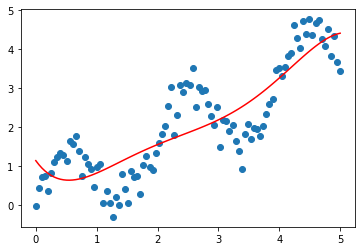

In [17]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [18]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.1642803   2.94826955 -1.36680806  0.28574304 -0.02155468]
interception:  1.145425443385589


In [19]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.14542544, 1.04346446, 0.95551346, 0.88058183, 0.81772187,
       0.76602796, 0.72463569, 0.69272101, 0.66949941, 0.65422503,
       0.64618987, 0.64472284, 0.64918902, 0.65898873, 0.67355673,
       0.69236134, 0.71490361, 0.74071644, 0.76936376, 0.80043969,
       0.83356764, 0.86839951, 0.90461481, 0.94191983, 0.98004678,
       1.01875292, 1.05781977, 1.09705218, 1.13627754, 1.17534492,
       1.21412419, 1.25250521, 1.29039695, 1.32772664, 1.36443896,
       1.40049515, 1.43587215, 1.47056179, 1.50456993, 1.53791558,
       1.57063008, 1.60275625, 1.63434752, 1.6654671 , 1.69618711,
       1.72658776, 1.75675645, 1.78678699, 1.81677869, 1.84683552,
       1.87706531, 1.90757882, 1.93848895, 1.96990989, 2.00195622,
       2.0347421 , 2.06838043, 2.10298197, 2.13865449, 2.17550196,
       2.21362364, 2.25311329, 2.29405828, 2.33653875, 2.38062676,
       2.42638546, 2.47386819, 2.52311771, 2.57416525, 2.62702975,
       2.68171696, 2.7382186 , 2.79651151, 2.85655682, 2.91829

In [18]:
regr_poly.predict(X_poly)

array([0.88285626, 0.86112702, 0.84381738, 0.83061887, 0.8212375 ,
       0.81539355, 0.81282117, 0.8132681 , 0.81649541, 0.82227709,
       0.83039986, 0.84066275, 0.85287687, 0.86686504, 0.88246155,
       0.89951178, 0.91787193, 0.93740872, 0.95799903, 0.97952966,
       1.00189695, 1.02500653, 1.04877297, 1.0731195 , 1.09797767,
       1.12328708, 1.14899501, 1.17505619, 1.20143243, 1.22809232,
       1.25501095, 1.28216956, 1.30955527, 1.33716073, 1.36498385,
       1.39302747, 1.42129905, 1.44981037, 1.47857719, 1.507619  ,
       1.53695866, 1.56662209, 1.59663801, 1.62703756, 1.65785407,
       1.68912267, 1.72088003, 1.75316405, 1.78601354, 1.8194679 ,
       1.85356682, 1.88834998, 1.92385673, 1.96012578, 1.99719491,
       2.03510061, 2.07387784, 2.11355965, 2.15417695, 2.19575812,
       2.23832874, 2.2819113 , 2.32652484, 2.3721847 , 2.41890214,
       2.46668411, 2.51553288, 2.56544574, 2.61641472, 2.66842625,
       2.72146088, 2.77549293, 2.83049023, 2.88641374, 2.94321

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [23]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [24]:
sigma = 0.3

In [25]:
x

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [26]:
y

array([-0.02079104,  0.45208563,  0.72267699,  0.76053522,  0.37093367,
        0.83986383,  1.10586962,  1.23692519,  1.34879993,  1.29931911,
        1.12746982,  1.65456803,  1.58385226,  1.78594955,  1.38515183,
        0.73966846,  1.22680599,  1.05414519,  0.93535072,  0.48035177,
        0.97102002,  1.07159017,  0.07178296,  0.36901095,  0.05217315,
       -0.2964178 ,  0.22192592,  0.00912448,  0.79218238,  0.40835094,
        0.05125202,  0.88603189,  0.73637348,  0.74323158,  0.30218089,
        1.02523952,  1.2589857 ,  0.99445403,  0.91234063,  1.33872161,
        1.61034859,  1.81811584,  2.03231362,  2.55225061,  3.02439348,
        1.81496413,  2.30454212,  3.07294057,  2.91489148,  3.13831235,
        3.0798468 ,  3.51951934,  2.51948956,  3.04021734,  2.9355343 ,
        2.96157673,  2.58619404,  2.28353459,  2.04698707,  2.5100166 ,
        1.50523925,  2.18302942,  2.16339428,  1.90247403,  2.05062131,
        1.65290918,  1.3983591 ,  0.94129331,  1.82836227,  2.09

In [27]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

X_rbf

array([[2.49352209e-01, 3.72665317e-06, 8.32396968e-16, 2.77873902e-30,
        1.38634329e-49],
       [3.25472872e-01, 8.52574586e-06, 3.33776477e-15, 1.95292168e-29,
        1.70773187e-48],
       [4.12959721e-01, 1.89599467e-05, 1.30098499e-14, 1.33417628e-28,
        2.04484269e-47],
       [5.09321387e-01, 4.09857759e-05, 4.92924229e-14, 8.85998378e-28,
        2.38007940e-46],
       [6.10614979e-01, 8.61232743e-05, 1.81542941e-13, 5.71931425e-27,
        2.69286330e-45],
       [7.11597342e-01, 1.75913523e-04, 6.49934950e-13, 3.58877569e-26,
        2.96161426e-44],
       [8.06106646e-01, 3.49276399e-04, 2.26178717e-12, 2.18897091e-25,
        3.16616832e-43],
       [8.87650512e-01, 6.74109702e-04, 7.65111808e-12, 1.29785145e-24,
        3.29026462e-42],
       [9.50129573e-01, 1.26468753e-03, 2.51587693e-11, 7.47999499e-24,
        3.32367827e-41],
       [9.88587205e-01, 2.30636063e-03, 8.04165068e-11, 4.19052994e-23,
        3.26361145e-40],
       [9.99858301e-01, 4.0884

In [29]:
regr_rbf = LinearRegression()

In [30]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

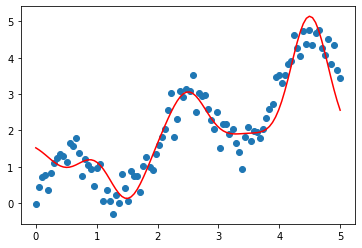

In [31]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [32]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.70904904 -1.57201809  1.36785703  0.2061986   3.44212957]
interception:  1.698390419829922


#### Comparison

In [33]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

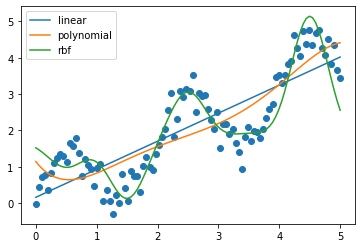

In [34]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [35]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5797936118984435


In [36]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5049658100884793


In [37]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24576667716765338
